In [142]:
import pandas as pd
import numpy as np

In [143]:
# Get data for peptide variants with at least 20 non-NaN values in the controls columns
peptide_variants_df = pd.read_csv('filtered_data.csv', low_memory=False)
print(f"Number of rows in our filtered peptide : {len(peptide_variants_df)}")
print(f"Columns: {peptide_variants_df.columns}")
peptide_variants_df.head()

Number of rows in our filtered peptide : 4168
Columns: Index(['rowid', 'ccms_row_id', 'Variant', 'Variant ID', 'Unmod variant',
       'Total', 'Total- Unmodified sequence', 'Variants- Unmodified sequence',
       'Proteins', 'Mass',
       ...
       'baricitib_1000nm', 'baricitib_100nm', 'baricitib_10nm',
       'baricitib_30000nm', 'baricitib_3000nm', 'baricitib_300nm',
       'baricitib_30nm', 'baricitib_3nm', 'baricitib_dmso', 'baricitib_pdpd'],
      dtype='object', length=463)


,rowid,ccms_row_id,Variant,Variant ID,Unmod variant,Total,Total- Unmodified sequence,Variants- Unmodified sequence,Proteins,Mass,...,baricitib_1000nm,baricitib_100nm,baricitib_10nm,baricitib_30000nm,baricitib_3000nm,baricitib_300nm,baricitib_30nm,baricitib_3nm,baricitib_dmso,baricitib_pdpd
0,5,5,.ESESTAGSFSLSVR.,21292,.ESESTAGSFSLSVR.,7995,8328,7,sp|P06239-2|LCK_HUMAN;sp|P06239-3|LCK_HUMAN;sp...,1456.7,...,11120000.0,15061000.0,18264000.0,13380000.0,14280000.0,19220000.0,11216000.0,12721000.0,12835000.0,8137600.0
1,7,7,.IQDKEGIPPDQQR.,39596,.IQDKEGIPPDQQR.,6836,6882,7,sp|P0CG47|UBB_HUMAN;sp|P0CG48|UBC_HUMAN;sp|P62...,1523.8,...,1740400.0,9648200.0,16877000.0,2505000.0,3093800.0,4726100.0,7930900.0,8424800.0,11643000.0,5830600.0
2,11,11,.IFTSIGEDYDER.,36599,.IFTSIGEDYDER.,5284,5412,7,sp|P35232-2|PHB_HUMAN;sp|P35232|PHB_HUMAN;tr|C...,1444.6,...,31864000.0,123890000.0,130640000.0,46563000.0,37421000.0,54811000.0,96800000.0,78860000.0,75034000.0,70372000.0
3,14,14,.TAVC+57.021DIPPR.,87369,.TAVCDIPPR.,4837,4837,1,sp|A6NNZ2|TBB8B_HUMAN;sp|P04350|TBB4A_HUMAN;sp...,1085.5,...,1097300.0,2733200.0,6343300.0,987920.0,1095500.0,2920500.0,4860600.0,7768400.0,2558000.0,3113400.0
4,15,15,.IITHPNFNGNTLDNDIMLIK.,37659,.IITHPNFNGNTLDNDIMLIK.,4830,20735,81,TRYP_PIG,2283.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
# Get total numbr of unmodified peptides
unmodified_peptides = peptide_variants_df['Unmod variant'].unique()
print(f"Number of unique unmodified peptides: {len(unmodified_peptides)}")
print(f"Unmodified peptides: {unmodified_peptides}")

Number of unique unmodified peptides: 4162
Unmodified peptides: ['.ESESTAGSFSLSVR.' '.IQDKEGIPPDQQR.' '.IFTSIGEDYDER.' ...
 '.KQQSIAGSADSKPIDVSR.' '.LNLYELK.' '.AGAGPGGPPQKPAPSSQR.']


In [145]:
# Get total number of peptide rows that uniquely match to a single protein
single_protein_peptide_rows = peptide_variants_df[peptide_variants_df['Proteins'].str.contains(';') == False] 
print(f"Number of peptide rows that uniquely match to a single protein: {len(single_protein_peptide_rows)}")

# Get the unique proteins from that dataframe
unique_proteins = single_protein_peptide_rows['Proteins'].unique()
print(f"Number of unique proteins: {len(unique_proteins)}")
print(f"Unique proteins: {unique_proteins}")

single_protein_peptide_rows.head()

Number of peptide rows that uniquely match to a single protein: 645
Number of unique proteins: 227
Unique proteins: ['TRYP_PIG' 'sp|P41240|CSK_HUMAN' 'sp|P14174|MIF_HUMAN'
 'sp|P19338|NUCL_HUMAN' 'sp|Q8TD19|NEK9_HUMAN' 'sp|Q00535|CDK5_HUMAN'
 'sp|P21796|VDAC1_HUMAN' 'sp|Q9H773|DCTP1_HUMAN' 'sp|P10809|CH60_HUMAN'
 'sp|P06576|ATPB_HUMAN' 'sp|Q9Y478|AAKB1_HUMAN' 'sp|P28482|MK01_HUMAN'
 'sp|Q16832|DDR2_HUMAN' 'sp|P38646|GRP75_HUMAN' 'sp|P11021|BIP_HUMAN'
 'sp|P04264|K2C1_HUMAN' 'sp|O96013|PAK4_HUMAN' 'sp|P06241|FYN_HUMAN'
 'sp|P41743|KPCI_HUMAN' 'sp|O43353|RIPK2_HUMAN' 'sp|P13639|EF2_HUMAN'
 'sp|Q9Y4K4|M4K5_HUMAN' 'sp|Q9H479|FN3K_HUMAN' 'sp|P17252|KPCA_HUMAN'
 'sp|P08238|HS90B_HUMAN' 'sp|P61981|1433G_HUMAN' 'sp|O14965|AURKA_HUMAN'
 'sp|P68371|TBB4B_HUMAN' 'sp|P62269|RS18_HUMAN' 'sp|Q9Y2U5|M3K2_HUMAN'
 'sp|P62857|RS28_HUMAN' 'sp|P05387|RLA2_HUMAN' 'sp|P62906|RL10A_HUMAN'
 'sp|Q16539-2|MK14_HUMAN' 'sp|P30050|RL12_HUMAN' 'sp|Q01650|LAT1_HUMAN'
 'sp|P04843|RPN1_HUMAN' 'sp|Q9Y5S2|MRCKB_HUMAN' '

,rowid,ccms_row_id,Variant,Variant ID,Unmod variant,Total,Total- Unmodified sequence,Variants- Unmodified sequence,Proteins,Mass,...,baricitib_1000nm,baricitib_100nm,baricitib_10nm,baricitib_30000nm,baricitib_3000nm,baricitib_300nm,baricitib_30nm,baricitib_3nm,baricitib_dmso,baricitib_pdpd
4,15,15,.IITHPNFNGNTLDNDIMLIK.,37659,.IITHPNFNGNTLDNDIMLIK.,4830,20735,81,TRYP_PIG,2283.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,44,44,.VATVSLPR.,93900,.VATVSLPR.,3321,4190,31,TRYP_PIG,842.5,...,61496000.0,129770000.0,143420000.0,72081000.0,74186000.0,80264000.0,109580000.0,102580000.0,108150000.0,NaN
28,70,70,.HSNLVQLLGVIVEEK.,34569,.HSNLVQLLGVIVEEK.,2868,3656,28,sp|P41240|CSK_HUMAN,1677.9,...,19260000.0,29677000.0,29522000.0,17026000.0,16907000.0,17734000.0,37630000.0,27651000.0,23940000.0,13555000.0
48,116,116,.PMFIVNTNVPR.,69186,.PMFIVNTNVPR.,2361,10053,12,sp|P14174|MIF_HUMAN,1287.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,117,117,.KFGYVDFESAEDLEK.,43172,.KFGYVDFESAEDLEK.,2353,2644,10,sp|P19338|NUCL_HUMAN,1776.8,...,NaN,7106200.0,7063300.0,2148800.0,NaN,1679900.0,6958900.0,5593000.0,4346100.0,2534600.0


In [146]:
# Get the mean, median, and standard deviation of the control abundance values for each peptide variant
start_col = 'aew541_1000nm' # Start from first drug column 
start_idx = peptide_variants_df.columns.get_loc(start_col)

# Get the columns with drug treatment peptide abundance data
drug_columns = peptide_variants_df.columns[start_idx:]
filtered_drug_columns = [col for col in drug_columns if not col.endswith('_pdpd')] # Drop PDPD columns
dmso_columns = [col for col in drug_columns if col.endswith('_dmso')] # Get control columns

# Add control means, medians, and standard deviations to the dataframe
peptide_variants_df['Control_Mean_Abundance'] = peptide_variants_df[dmso_columns].mean(axis=1, skipna=True)
peptide_variants_df['Control_Median_Abundance'] = peptide_variants_df[dmso_columns].median(axis=1, skipna=True)
peptide_variants_df['Control_StdDev_Abundance'] = peptide_variants_df[dmso_columns].std(axis=1, skipna=True)

peptide_variants_df[['Variant', 'Control_Mean_Abundance', 'Control_Median_Abundance', 'Control_StdDev_Abundance', 'aew541_1000nm']].head()

,Variant,Control_Mean_Abundance,Control_Median_Abundance,Control_StdDev_Abundance,aew541_1000nm
0,.ESESTAGSFSLSVR.,7.538684e+06,5292500.0,6.148641e+06,15921000.0
1,.IQDKEGIPPDQQR.,8.102660e+06,4881150.0,1.219251e+07,4450700.0
2,.IFTSIGEDYDER.,2.524981e+07,12670000.0,3.442672e+07,8153300.0
3,.TAVC+57.021DIPPR.,5.945529e+06,2138200.0,1.178531e+07,4442300.0
4,.IITHPNFNGNTLDNDIMLIK.,1.313119e+08,52608000.0,1.985865e+08,134780000.0


In [147]:
# Check if mean, median, and standard deviation are correct

# Get DMSO values for first peptide variant
peptide_variant_dmso_row = peptide_variants_df.iloc[0][dmso_columns]
mean_val = peptide_variant_dmso_row.mean(skipna=True)
median_val = peptide_variant_dmso_row.median(skipna=True)
std_val = peptide_variant_dmso_row.std(skipna=True)

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Standard Deviation: {std_val}")

# Check if the calculated values match the dataframe values
peptide_variants_df[['Variant', 'Control_Mean_Abundance', 'Control_Median_Abundance', 'Control_StdDev_Abundance']].head(1)


Mean: 7538683.902439024
Median: 5292500.0
Standard Deviation: 6148640.6690364815


,Variant,Control_Mean_Abundance,Control_Median_Abundance,Control_StdDev_Abundance
0,.ESESTAGSFSLSVR.,7.538684e+06,5292500.0,6.148641e+06


In [148]:
# Compute ratios and log ratios for each drug treatment column
peptide_variants_ratios = peptide_variants_df.copy()
peptide_variants_log_ratios = peptide_variants_df.copy()

for col in filtered_drug_columns:
    peptide_variants_ratios[col] = np.where(
        peptide_variants_df['Control_Median_Abundance'] > 0,
        peptide_variants_df[col] / peptide_variants_df['Control_Median_Abundance'],
        np.nan
    )
    peptide_variants_log_ratios[col] = np.where(
        peptide_variants_df['Control_Median_Abundance'] > 0,
        np.log(peptide_variants_df[col] / peptide_variants_df['Control_Median_Abundance']),
        np.nan
    )

peptide_variants_df[['Variant', 'Control_Median_Abundance'] + filtered_drug_columns[:9]].head()

,Variant,Control_Median_Abundance,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso
0,.ESESTAGSFSLSVR.,5292500.0,15921000.0,35107000.0,23510000.0,7003800.0,11974000.0,28975000.0,23871000.0,25788000.0,24221000.0
1,.IQDKEGIPPDQQR.,4881150.0,4450700.0,7027600.0,4492100.0,3121300.0,3327800.0,3826700.0,1551300.0,4841800.0,4596300.0
2,.IFTSIGEDYDER.,12670000.0,8153300.0,13776000.0,9365300.0,6006600.0,8228400.0,13621000.0,5029400.0,10542000.0,9534400.0
3,.TAVC+57.021DIPPR.,2138200.0,4442300.0,7561200.0,6468900.0,3167000.0,3713800.0,6473200.0,3499900.0,8563200.0,6993100.0
4,.IITHPNFNGNTLDNDIMLIK.,52608000.0,134780000.0,300930000.0,167050000.0,107730000.0,155910000.0,219370000.0,80393000.0,144490000.0,130720000.0


In [149]:
peptide_variants_ratios[['Variant', 'Control_Median_Abundance'] + filtered_drug_columns[:9]].head()

,Variant,Control_Median_Abundance,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso
0,.ESESTAGSFSLSVR.,5292500.0,3.008219,6.633349,4.442135,1.323344,2.262447,5.474728,4.510345,4.872556,4.576476
1,.IQDKEGIPPDQQR.,4881150.0,0.911814,1.439743,0.920295,0.639460,0.681766,0.783975,0.317814,0.991938,0.941643
2,.IFTSIGEDYDER.,12670000.0,0.643512,1.087293,0.739171,0.474081,0.649440,1.075059,0.396953,0.832044,0.752518
3,.TAVC+57.021DIPPR.,2138200.0,2.077589,3.536245,3.025395,1.481152,1.736881,3.027406,1.636844,4.004864,3.270555
4,.IITHPNFNGNTLDNDIMLIK.,52608000.0,2.561968,5.720233,3.175373,2.047787,2.963618,4.169898,1.528152,2.746540,2.484793


In [150]:
peptide_variants_log_ratios[['Variant', 'Control_Median_Abundance'] + filtered_drug_columns[:9]].head()

,Variant,Control_Median_Abundance,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso
0,.ESESTAGSFSLSVR.,5292500.0,1.101348,1.892110,1.491135,0.280162,0.816447,1.700143,1.506374,1.583619,1.520929
1,.IQDKEGIPPDQQR.,4881150.0,-0.092319,0.364464,-0.083061,-0.447131,-0.383069,-0.243378,-1.146288,-0.008094,-0.060129
2,.IFTSIGEDYDER.,12670000.0,-0.440814,0.083691,-0.302226,-0.746378,-0.431645,0.072376,-0.923936,-0.183870,-0.284331
3,.TAVC+57.021DIPPR.,2138200.0,0.731208,1.263066,1.107042,0.392820,0.552091,1.107706,0.492770,1.387510,1.184960
4,.IITHPNFNGNTLDNDIMLIK.,52608000.0,0.940776,1.744009,1.155425,0.716760,1.086411,1.427892,0.424059,1.010342,0.910189


In [151]:
# Get median log ratios and standard deviations of log ratios for each peptide variant

peptide_variants_log_ratios['Control_Log_Ratio_Median'] = peptide_variants_log_ratios[dmso_columns].median(axis=1, skipna=True)
peptide_variants_log_ratios['Control_Log_Ratio_StdDev'] = peptide_variants_log_ratios[dmso_columns].std(axis=1, skipna=True)
peptide_variants_log_ratios[['Variant', 'Control_Log_Ratio_Median', 'Control_Log_Ratio_StdDev'] + filtered_drug_columns[:9]].head()

/tmp/ipykernel_28704/1521125347.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  peptide_variants_log_ratios['Control_Log_Ratio_Median'] = peptide_variants_log_ratios[dmso_columns].median(axis=1, skipna=True)
/tmp/ipykernel_28704/1521125347.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  peptide_variants_log_ratios['Control_Log_Ratio_StdDev'] = peptide_variants_log_ratios[dmso_columns].std(axis=1, skipna=True)


,Variant,Control_Log_Ratio_Median,Control_Log_Ratio_StdDev,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso
0,.ESESTAGSFSLSVR.,0.000000,0.856921,1.101348,1.892110,1.491135,0.280162,0.816447,1.700143,1.506374,1.583619,1.520929
1,.IQDKEGIPPDQQR.,-0.001706,0.905393,-0.092319,0.364464,-0.083061,-0.447131,-0.383069,-0.243378,-1.146288,-0.008094,-0.060129
2,.IFTSIGEDYDER.,0.000000,1.088943,-0.440814,0.083691,-0.302226,-0.746378,-0.431645,0.072376,-0.923936,-0.183870,-0.284331
3,.TAVC+57.021DIPPR.,-0.000006,1.200130,0.731208,1.263066,1.107042,0.392820,0.552091,1.107706,0.492770,1.387510,1.184960
4,.IITHPNFNGNTLDNDIMLIK.,-0.000048,1.679313,0.940776,1.744009,1.155425,0.716760,1.086411,1.427892,0.424059,1.010342,0.910189


In [152]:
# Get peptide_z-scores over log ratio values

peptide_variants_z_scores = peptide_variants_log_ratios.copy()
for col in filtered_drug_columns:
    peptide_variants_z_scores[col] = np.where(
        peptide_variants_z_scores['Control_Log_Ratio_StdDev'] > 0,
        (peptide_variants_z_scores[col] - peptide_variants_z_scores['Control_Log_Ratio_Median']) / peptide_variants_z_scores['Control_Log_Ratio_StdDev'],
        np.nan
    )

peptide_variants_z_scores[['Variant', 'Control_Log_Ratio_Median', 'Control_Log_Ratio_StdDev'] + filtered_drug_columns[:9]].head()

,Variant,Control_Log_Ratio_Median,Control_Log_Ratio_StdDev,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso
0,.ESESTAGSFSLSVR.,0.000000,0.856921,1.285239,2.208032,1.740108,0.326940,0.952768,1.984013,1.757890,1.848033,1.774876
1,.IQDKEGIPPDQQR.,-0.001706,0.905393,-0.100082,0.404432,-0.089856,-0.491970,-0.421214,-0.266925,-1.264183,-0.007056,-0.064528
2,.IFTSIGEDYDER.,0.000000,1.088943,-0.404809,0.076855,-0.277540,-0.685415,-0.396389,0.066464,-0.848471,-0.168852,-0.261107
3,.TAVC+57.021DIPPR.,-0.000006,1.200130,0.609279,1.052446,0.922440,0.327320,0.460031,0.922994,0.410602,1.156138,0.987365
4,.IITHPNFNGNTLDNDIMLIK.,-0.000048,1.679313,0.560243,1.038554,0.688063,0.426846,0.646966,0.850312,0.252548,0.601669,0.542030


In [153]:
# Get peptide z-score vectors for clustering
peptide_vectors = peptide_variants_z_scores[['Variant'] + filtered_drug_columns].set_index('Variant')
peptide_vectors.head()

,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso,amg208_1000nm,...,barasertibhqpa_dmso,baricitib_1000nm,baricitib_100nm,baricitib_10nm,baricitib_30000nm,baricitib_3000nm,baricitib_300nm,baricitib_30nm,baricitib_3nm,baricitib_dmso
Variant,,,,,,,,,,,,,,,,,,,,,
.ESESTAGSFSLSVR.,1.285239,2.208032,1.740108,0.326940,0.952768,1.984013,1.757890,1.848033,1.774876,-0.014666,...,-0.005082,0.866421,1.220436,1.445455,1.082329,1.158297,1.504993,0.876452,1.023389,1.033800
.IQDKEGIPPDQQR.,-0.100082,0.404432,-0.089856,-0.491970,-0.421214,-0.266925,-1.264183,-0.007056,-0.064528,-0.219221,...,-0.357942,-1.137142,0.754475,1.372086,-0.734915,-0.501744,-0.033770,0.537989,0.604715,0.962047
.IFTSIGEDYDER.,-0.404809,0.076855,-0.277540,-0.685415,-0.396389,0.066464,-0.848471,-0.168852,-0.261107,-3.046919,...,0.694054,0.846913,2.093918,2.142637,1.195260,0.994538,1.345024,1.867325,1.679094,1.633423
.TAVC+57.021DIPPR.,0.609279,1.052446,0.922440,0.327320,0.460031,0.922994,0.410602,1.156138,0.987365,NaN,...,-0.481868,-0.555861,0.204574,0.906103,-0.643357,-0.557229,0.259802,0.684262,1.074972,0.149373
.IITHPNFNGNTLDNDIMLIK.,0.560243,1.038554,0.688063,0.426846,0.646966,0.850312,0.252548,0.601669,0.542030,-0.468655,...,1.503147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4168 samples in 0.006s...
[t-SNE] Computed neighbors for 4168 samples in 0.190s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4168
[t-SNE] Computed conditional probabilities for sample 2000 / 4168
[t-SNE] Computed conditional probabilities for sample 3000 / 4168
[t-SNE] Computed conditional probabilities for sample 4000 / 4168
[t-SNE] Computed conditional probabilities for sample 4168 / 4168
[t-SNE] Mean sigma: 3.450251
[t-SNE] Computed conditional probabilities in 0.078s
[t-SNE] Iteration 50: error = 83.3817520, gradient norm = 0.0000058 (50 iterations in 0.733s)
[t-SNE] Iteration 100: error = 83.3817520, gradient norm = 0.0000005 (50 iterations in 0.642s)
[t-SNE] Iteration 150: error = 83.3817444, gradient norm = 0.0000003 (50 iterations in 0.541s)
[t-SNE] Iteration 200: error = 83.3817520, gradient norm = 0.0000001 (50 iterations in 0.509s)
[t-SNE] Iteration 250: error = 83.3817444, gradient norm = 0.0000000

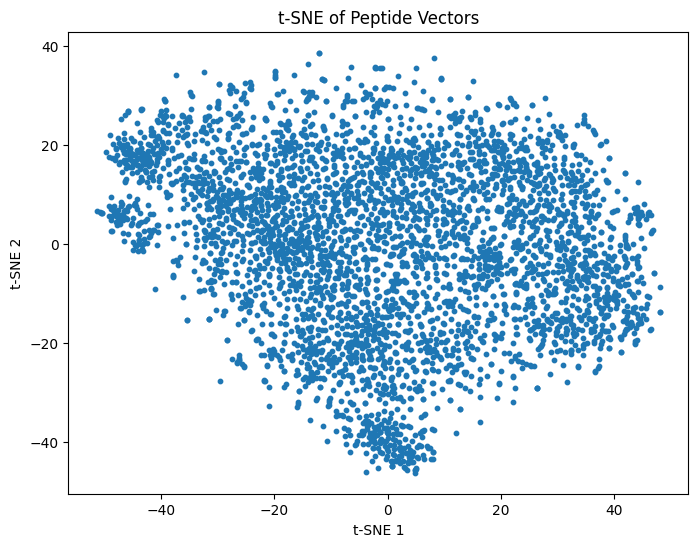

In [157]:
# Plot the peptide z-score vectors using TSNE, UMAP, and PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X = peptide_vectors.fillna(0)
reduced_vectors = TSNE(n_components=2, n_jobs=1, random_state=0, verbose=2).fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], s=10)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE of Peptide Vectors')
plt.show()

In [154]:
# Perform HDBSCAN clustering on z-scores
from hdbscan import HDBSCAN

# Replace all NaN values with 0 in peptide_vectors
X = peptide_vectors.fillna(0)

clusterer = HDBSCAN(min_cluster_size=2, min_samples=1)
clusterer.fit(X)
labels = clusterer.labels_
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found: {num_clusters}")
print(f"Cluster labels: {set(labels)}")

# Add cluster labels to the peptide_vectors dataframe
peptide_vectors['Cluster'] = labels

# Show the first few cluster assignments
peptide_vectors[['Cluster']].head()

# Print the size of each cluster
cluster_sizes = peptide_vectors['Cluster'].value_counts().sort_index()
print("Cluster sizes:\n", cluster_sizes)

/home/ronit/miniconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ronit/miniconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Number of clusters found: 2
Cluster labels: {np.int64(0), np.int64(1), np.int64(-1)}
Cluster sizes:
 Cluster
-1      34
 0    4132
 1       2
Name: count, dtype: int64


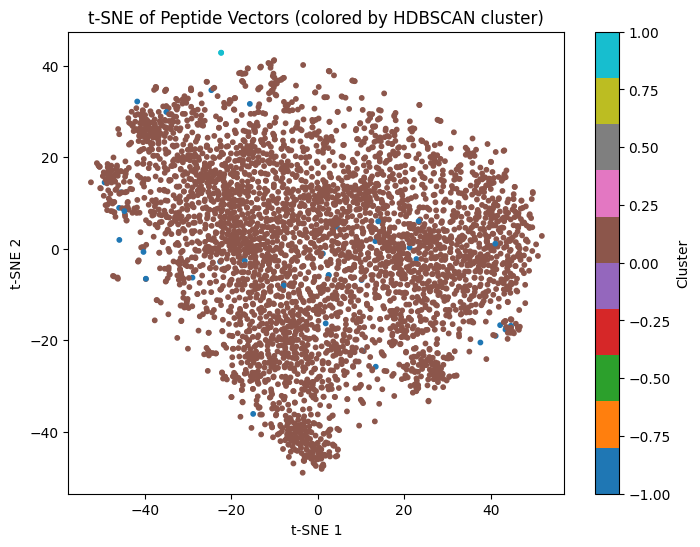

In [155]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Use the same X as for clustering (peptide_vectors with NaNs filled as 0)
X = peptide_vectors.fillna(0)

# Run t-SNE (reduce to 2D for plotting)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X)

# Plot, coloring by cluster label
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_embedded[:,0], X_embedded[:,1], c=peptide_vectors['Cluster'], cmap='tab10', s=10)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE of Peptide Vectors (colored by HDBSCAN cluster)')
plt.colorbar(scatter, label='Cluster')
plt.show()

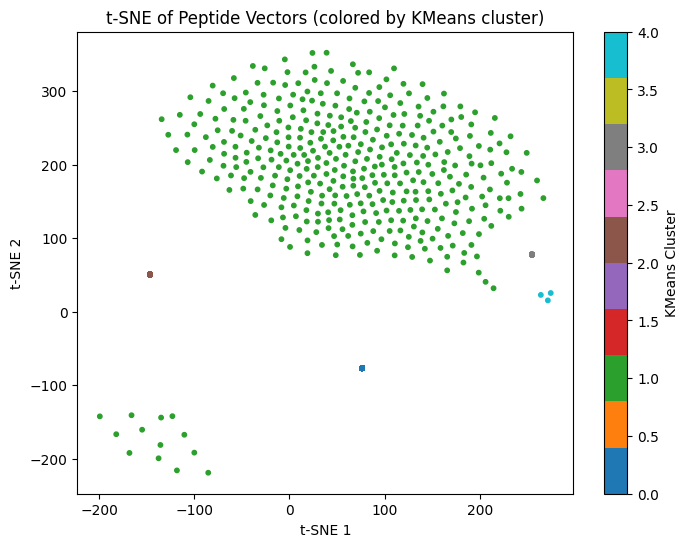

In [129]:
from sklearn.cluster import KMeans

# Use the same X as for HDBSCAN (NaNs filled with 0)
X = peptide_vectors.fillna(0)

# Choose number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Add KMeans cluster labels to the dataframe
peptide_vectors['KMeans_Cluster'] = kmeans_labels

# Plot t-SNE colored by KMeans cluster
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_embedded[:,0], X_embedded[:,1], c=peptide_vectors['KMeans_Cluster'], cmap='tab10', s=10)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE of Peptide Vectors (colored by KMeans cluster)')
plt.colorbar(scatter, label='KMeans Cluster')

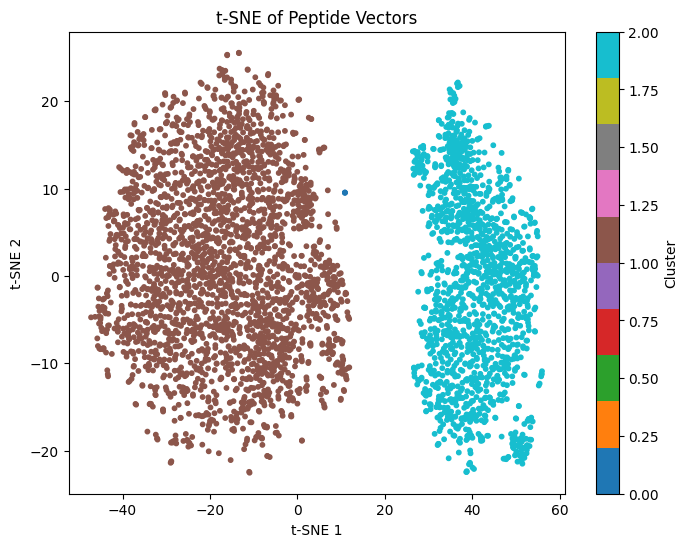

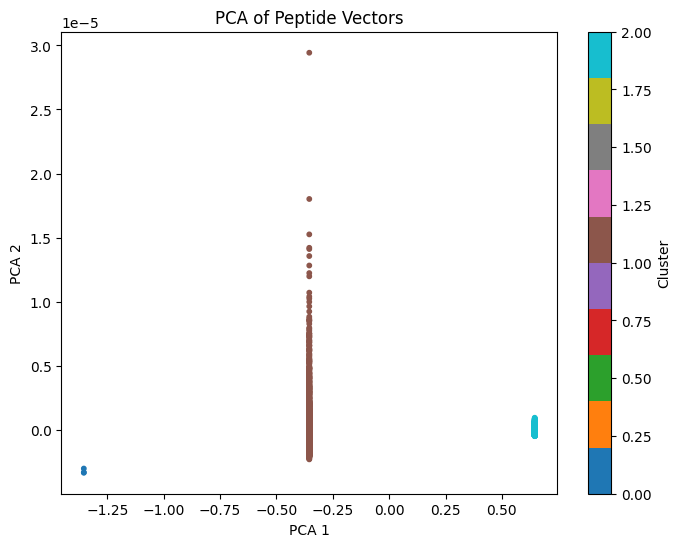

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- PCA ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=peptide_vectors['Cluster'], cmap='tab10', s=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Peptide Vectors')
plt.show()

In [86]:
import pandas as pd
import numpy as np

In [87]:
df = pd.read_csv('filtered_data.csv')
start_col = 'aew541_1000nm'
start_idx = df.columns.get_loc(start_col)
drug_columns = df.columns[start_idx:]
filtered_drug_columns = [col for col in drug_columns if not col.endswith('_pdpd')]

/tmp/ipykernel_28704/1317422812.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('filtered_data.csv')


In [88]:
# Parse protein lists and explode
df['Protein_List'] = df['Proteins'].str.split(';')
df_exploded = df.explode('Protein_List')
df_exploded['Protein'] = df_exploded['Protein_List'].str.strip().str.split('|').str[-1]
df_exploded.head()

,rowid,ccms_row_id,Variant,Variant ID,Unmod variant,Total,Total- Unmodified sequence,Variants- Unmodified sequence,Proteins,Mass,...,baricitib_10nm,baricitib_30000nm,baricitib_3000nm,baricitib_300nm,baricitib_30nm,baricitib_3nm,baricitib_dmso,baricitib_pdpd,Protein_List,Protein
0,5,5,.ESESTAGSFSLSVR.,21292,.ESESTAGSFSLSVR.,7995,8328,7,sp|P06239-2|LCK_HUMAN;sp|P06239-3|LCK_HUMAN;sp...,1456.7,...,18264000.0,13380000.0,14280000.0,19220000.0,11216000.0,12721000.0,12835000.0,8137600.0,sp|P06239-2|LCK_HUMAN,LCK_HUMAN
0,5,5,.ESESTAGSFSLSVR.,21292,.ESESTAGSFSLSVR.,7995,8328,7,sp|P06239-2|LCK_HUMAN;sp|P06239-3|LCK_HUMAN;sp...,1456.7,...,18264000.0,13380000.0,14280000.0,19220000.0,11216000.0,12721000.0,12835000.0,8137600.0,sp|P06239-3|LCK_HUMAN,LCK_HUMAN
0,5,5,.ESESTAGSFSLSVR.,21292,.ESESTAGSFSLSVR.,7995,8328,7,sp|P06239-2|LCK_HUMAN;sp|P06239-3|LCK_HUMAN;sp...,1456.7,...,18264000.0,13380000.0,14280000.0,19220000.0,11216000.0,12721000.0,12835000.0,8137600.0,sp|P06239|LCK_HUMAN,LCK_HUMAN
0,5,5,.ESESTAGSFSLSVR.,21292,.ESESTAGSFSLSVR.,7995,8328,7,sp|P06239-2|LCK_HUMAN;sp|P06239-3|LCK_HUMAN;sp...,1456.7,...,18264000.0,13380000.0,14280000.0,19220000.0,11216000.0,12721000.0,12835000.0,8137600.0,tr|E9PAP0|E9PAP0_HUMAN,E9PAP0_HUMAN
0,5,5,.ESESTAGSFSLSVR.,21292,.ESESTAGSFSLSVR.,7995,8328,7,sp|P06239-2|LCK_HUMAN;sp|P06239-3|LCK_HUMAN;sp...,1456.7,...,18264000.0,13380000.0,14280000.0,19220000.0,11216000.0,12721000.0,12835000.0,8137600.0,tr|E9PJ92|E9PJ92_HUMAN,E9PJ92_HUMAN


In [89]:
# Group by protein and calculate median across peptides
protein_abundance = df_exploded.groupby('Protein')[filtered_drug_columns].median().reset_index()
protein_abundance.head()

,Protein,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso,...,barasertibhqpa_dmso,baricitib_1000nm,baricitib_100nm,baricitib_10nm,baricitib_30000nm,baricitib_3000nm,baricitib_300nm,baricitib_30nm,baricitib_3nm,baricitib_dmso
0,1433B_HUMAN,3587700.0,7000700.0,5116200.0,2788900.0,3514250.0,7838000.0,3679200.0,4916000.0,3782300.0,...,2513300.0,5105900.0,13988400.0,18874500.0,4644400.0,6073900.0,10381000.0,13510000.0,7630600.0,12022150.0
1,1433E_HUMAN,6590750.0,9298300.0,8225800.0,6299800.0,4053200.0,8037700.0,3794600.0,10863000.0,6647500.0,...,4165800.0,4303100.0,13386000.0,17947000.0,6163750.0,5490000.0,5861100.0,12812000.0,7482150.0,11721500.0
2,1433F_HUMAN,3865350.0,6869150.0,4436400.0,2009980.0,5323675.0,6349610.0,2038605.0,4497950.0,4803100.0,...,5465450.0,3163300.0,15132100.0,20634950.0,4242100.0,4009650.0,6221000.0,13730400.0,9627450.0,16413150.0
3,1433G_HUMAN,5043800.0,9940000.0,9571800.0,4861800.0,7088900.0,8931600.0,4699600.0,9715200.0,12187000.0,...,3462750.0,5164600.0,9335900.0,14570700.0,7138700.0,8466000.0,13131000.0,12653000.0,8595000.0,7797350.0
4,1433S_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1007400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# Step 4: Compute per-protein statistics
protein_abundance['Mean_Abundance'] = protein_abundance[filtered_drug_columns].mean(axis=1, skipna=True)
protein_abundance['Median_Abundance'] = protein_abundance[filtered_drug_columns].median(axis=1, skipna=True)
protein_abundance['StdDev_Abundance'] = protein_abundance[filtered_drug_columns].std(axis=1, skipna=True)

protein_abundance.head()

,Protein,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso,...,baricitib_10nm,baricitib_30000nm,baricitib_3000nm,baricitib_300nm,baricitib_30nm,baricitib_3nm,baricitib_dmso,Mean_Abundance,Median_Abundance,StdDev_Abundance
0,1433B_HUMAN,3587700.0,7000700.0,5116200.0,2788900.0,3514250.0,7838000.0,3679200.0,4916000.0,3782300.0,...,18874500.0,4644400.0,6073900.0,10381000.0,13510000.0,7630600.0,12022150.0,5.631055e+06,3115550.0,7.630601e+06
1,1433E_HUMAN,6590750.0,9298300.0,8225800.0,6299800.0,4053200.0,8037700.0,3794600.0,10863000.0,6647500.0,...,17947000.0,6163750.0,5490000.0,5861100.0,12812000.0,7482150.0,11721500.0,6.284524e+06,3937475.0,1.204857e+07
2,1433F_HUMAN,3865350.0,6869150.0,4436400.0,2009980.0,5323675.0,6349610.0,2038605.0,4497950.0,4803100.0,...,20634950.0,4242100.0,4009650.0,6221000.0,13730400.0,9627450.0,16413150.0,4.470106e+06,2098100.0,1.070048e+07
3,1433G_HUMAN,5043800.0,9940000.0,9571800.0,4861800.0,7088900.0,8931600.0,4699600.0,9715200.0,12187000.0,...,14570700.0,7138700.0,8466000.0,13131000.0,12653000.0,8595000.0,7797350.0,6.773007e+06,4469825.0,8.049686e+06
4,1433S_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.662346e+06,2271500.0,9.272627e+06


In [91]:
# Normalize by protein median and log transform
for col in filtered_drug_columns:
    protein_abundance[col] = np.where(
        protein_abundance['Median_Abundance'] > 0,
        np.log(protein_abundance[col] / protein_abundance['Median_Abundance']),
        np.nan
    )
protein_abundance.head()

,Protein,aew541_1000nm,aew541_100nm,aew541_10nm,aew541_30000nm,aew541_3000nm,aew541_300nm,aew541_30nm,aew541_3nm,aew541_dmso,...,baricitib_10nm,baricitib_30000nm,baricitib_3000nm,baricitib_300nm,baricitib_30nm,baricitib_3nm,baricitib_dmso,Mean_Abundance,Median_Abundance,StdDev_Abundance
0,1433B_HUMAN,0.141106,0.809604,0.496006,-0.110758,0.120420,0.922578,0.166290,0.456089,0.193927,...,1.801406,0.399256,0.667595,1.203572,1.467024,0.895761,1.350345,5.631055e+06,3115550.0,7.630601e+06
1,1433E_HUMAN,0.515127,0.859292,0.736736,0.469978,0.028967,0.713603,-0.036961,1.014823,0.523701,...,1.516883,0.448146,0.332389,0.397798,1.179843,0.641981,1.090885,6.284524e+06,3937475.0,1.204857e+07
2,1433F_HUMAN,0.611020,1.186008,0.748811,-0.042907,0.931132,1.107361,-0.028766,0.762590,0.828229,...,2.285954,0.704026,0.647672,1.086898,1.878580,1.523586,2.057051,4.470106e+06,2098100.0,1.070048e+07
3,1433G_HUMAN,0.120811,0.799218,0.761472,0.084059,0.461181,0.692246,0.050128,0.776342,1.003021,...,1.181663,0.468181,0.638709,1.077627,1.040545,0.653831,0.556435,6.773007e+06,4469825.0,8.049686e+06
4,1433S_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.662346e+06,2271500.0,9.272627e+06


In [92]:
# protein_abundance.to_csv('protein_level_log_ratio_abundance.csv', index=False)